In [1]:
#Importing libraries to load the dataset

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv(r"C:\Users\sprat\Downloads\heart_dataset.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


The Dataset has no missing values

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#understanding the correlation between the features in the data

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

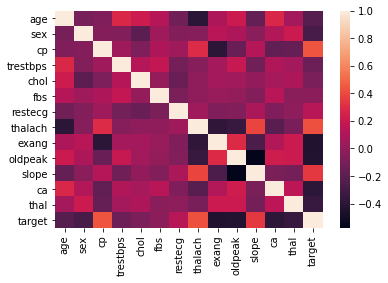

In [18]:
ax = sns.heatmap(data.corr())

In [74]:
#visualizing the distribution of each feature.

<ipython-input-38-14297dea6016>:12: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data[columns].hist(bins=num_bins, ax=ax)


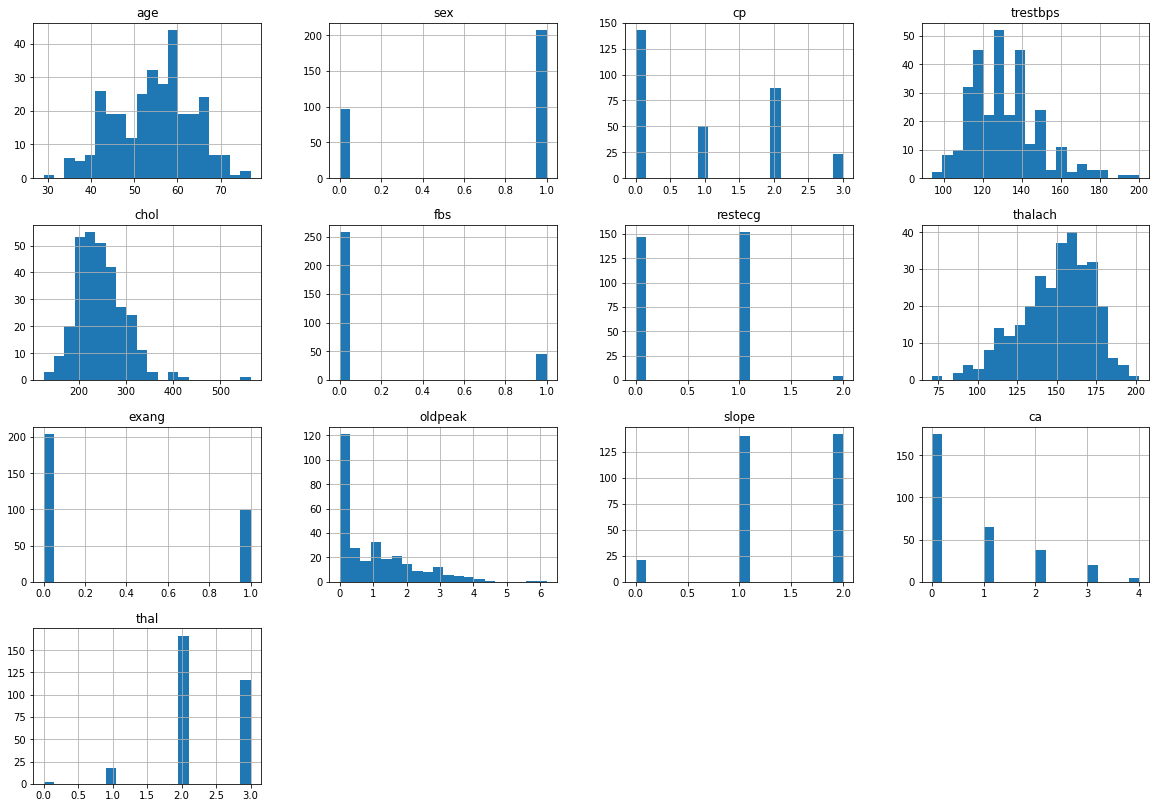

In [38]:
num_cols = len(data.columns)
num_bins = 20
num_cols_per_subplot = 13
num_subplots = np.ceil(num_cols / num_cols_per_subplot).astype(int)

fig, axes = plt.subplots(num_subplots, 1, figsize=(20, 14))

for i, ax in enumerate(axes.flat):
    start_col = i * num_cols_per_subplot
    end_col = min(start_col + num_cols_per_subplot, num_cols)
    columns = data.columns[start_col:end_col]
    data[columns].hist(bins=num_bins, ax=ax)

In [40]:
#checking for the target variable if its of equal size

Text(0.5, 1.0, 'Count of each Target Class')

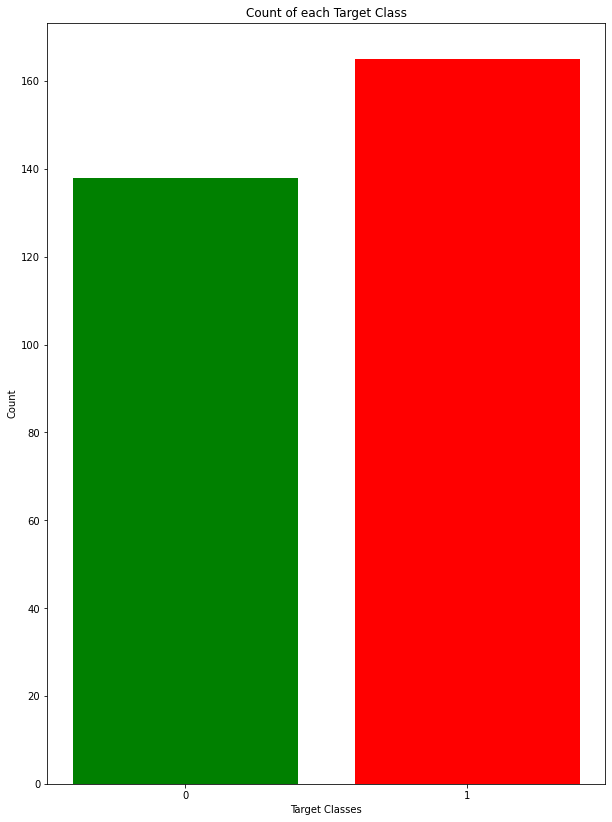

In [42]:
plt.figure(figsize=(10,14))
plt.bar(data['target'].unique(), data['target'].value_counts(), color = ['red','green'])
plt.xticks([0,1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [43]:
#The ratio of target data is good enough to continue without dropping or increasing the data

In [75]:
#converting categorical columns into dummmy variables and the scaling our data

In [44]:
data = pd.get_dummies(data, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
data

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.2,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
standardscaler = StandardScaler()

In [48]:
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[columns_to_scale] = standardscaler.fit_transform(data[columns_to_scale])

In [49]:
data

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [76]:
#Splitting our data into train and test splits and trying out different Machine Learning models 

In [50]:
from sklearn.model_selection import train_test_split

In [52]:
x = data.drop(['target'],axis=1)
y = data['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 0)

In [54]:
import math
math.sqrt(len(y_test))

10.0

KNN Algorithm

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn_scores = []
for k in range(1,11):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x_train,y_train)
    knn_scores.append(knn_classifier.score(x_test,y_test))

knn_scores

[0.76, 0.78, 0.86, 0.84, 0.83, 0.86, 0.84, 0.87, 0.84, 0.85]

Text(0, 0.5, 'Scores')

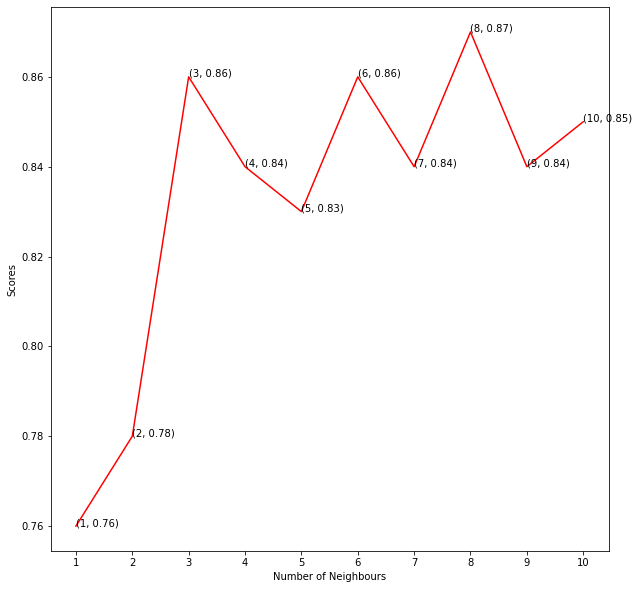

In [59]:
plt.figure(figsize=(10,10))
plt.plot([k for k in range(1,11)], knn_scores, color = 'red')
for i in range(1,11):
    plt.text(i, knn_scores[i-1], (i,knn_scores[i-1]))
plt.xticks([i for i in range(1,11)])
plt.xlabel('Number of Neighbours')
plt.ylabel('Scores')

In [60]:
#The score for K Neighbors Classifier is 87.0% with 8 nieghbors.

Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dt_scores = []
for i in range(1, len(x.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(x_train, y_train)
    dt_scores.append(dt_classifier.score(x_test, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

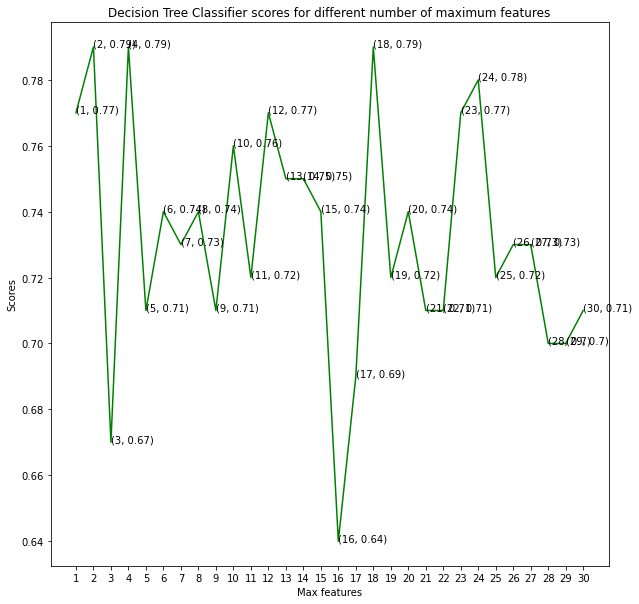

In [64]:
plt.figure(figsize=(10,10))
plt.plot([i for i in range(1, len(x.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(x.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(x.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [65]:
#The score for Decision Tree Classifier is 79.0% with [2, 4, 18] maximum features.

Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
dt_scores = []
for i in range(1, len(x.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(x_train, y_train)
    dt_scores.append(dt_classifier.score(x_test, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

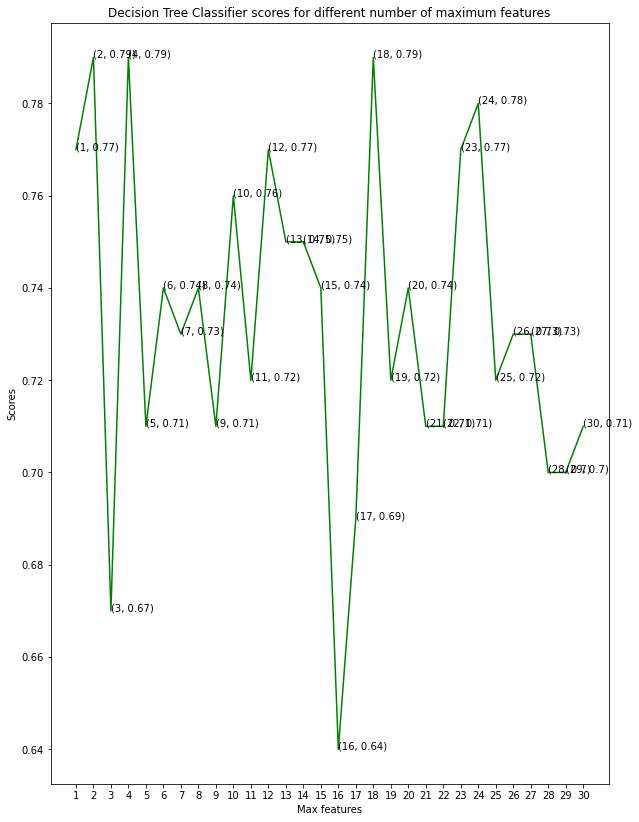

In [69]:
plt.figure(figsize=(10,14))
plt.plot([i for i in range(1, len(x.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(x.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(x.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [70]:
from matplotlib.cm import rainbow

In [71]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(x_train, y_train)
    rf_scores.append(rf_classifier.score(x_test, y_test))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

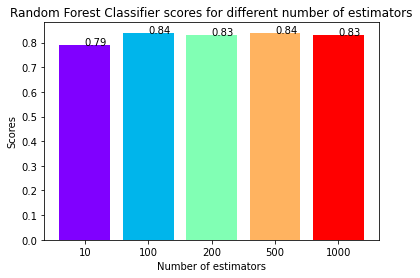

In [72]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [73]:
#The maximum score is achieved when the total estimators are 100 or 500.

K Neighbors Classifier achieved the highest score of 87% with 8 nearest neighbors.